誤差逆伝播法

計算グラフ
ex　リンゴ１００円を二個買うときの支払金額　ただし消費税１０パーセント

リンゴ→１００→×２→２００→×１．１→２２０→財布

計算グラフを使って問題を解くには…
１　計算グラフを構築する。
２　計算グラフ上で計算を左から右へと進める。(順伝播)
※逆方向（右から左）の計算は逆伝播という。
ポイントは各ノードの計算は単純であるということ。


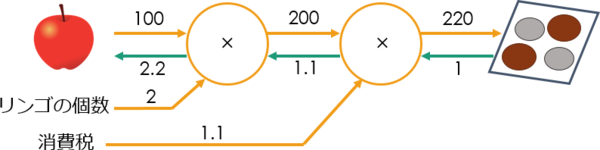

上図のように逆伝播の場合は逆向きに例示
逆伝播は右から左に１→１．１→２．２
と微分の値が伝達されている＝１円値上がりしたら支払金額は２．２円増える

計算グラフの逆伝播

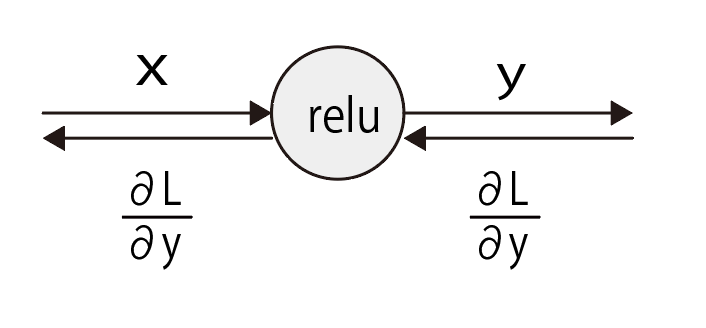

これはy=relu(x) という計算の微分を求めるということ








単純なレイヤの実装
(リンゴ2個、消費税１０パーセントの時の実例）

In [5]:
import numpy as np

class MulLayar:
    def __init__(self):
        self.x =None
        selfz.y=None
        
        def forward(self,x,y):
            self.x=x
            self.y=y
            out=x*y
            
            return out
        
        def backword(self,dout):
            dx =dout*self.y
            dy =dout*self.x
            
            return dx,dy
        
        apple=100
        apple_num=2
        tax=1.1
        
        mul_apple_layer =MulLayer()
        mul_tax_layer=MulLayer()
        
        apple_price=MulLayer()
        price = mul_tax_layer.forward(apple,apple_num)
        
        print (price)#220
        
        #各変数に関する微分＝backwardで求めることもできる↓
        #backward
        dprice = 1
        dapple_price,dtax = mul_tax_layer.backward(dprice)
        dapple,dapple_num =mul_apple_layer.backward(dapple_price)
        
        print(dapple,dapple_num,dtax)#2.2 110 200

In [ ]:
レイヤは加算レイヤ、活性関数レイヤ　RELUレイヤ　sigmoidレイヤ　SoftMaxレイヤなどいろいろな今まで学んだ関数や算術の形で実装できる
これらを組み合わせてニューラルネットワークを構築する。


ニューラルネットワークの学習の全対像
※前提　適応可能な重みとバイアスがありこの重みとバイアスを訓練データに適応するように調整すること＝学習
ニューラルネットワークの「学習」は4stepある。

step1　
　　　訓練データの中からランダムに一部のデータを選び出す。（＝ミニバッチ）
step2
　　　各重みパラメータに関する損失関数の勾配を求める。（＝勾配の算出）←逆誤差伝播法使用可能というか現実的に数値微分では厳しい
step3
　　　重みパラメータを勾配方向に微笑量だけ更新する。（パラメータの更新）
step4
　　　これを繰り返す
    
誤差逆伝播法に対応したニューラルネットワークの実装
   

In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict

class TwoLayerNet:
    
    def __init__(self,input_size, hidden_size,output_size,weight_init\std=0.01)
    #重みの初期化
    self.params={}
    self.params['W1']=weight_init_std * /
　　　　　　　　　np.random.randn(input_size,hidden_size)
    self.params['b1']np.zeros(hidden_size)
    self.params['W2']=weight_init_std * /
                      np.random.randn(hidden_size,output_size)
        selfparams['b2']=np.zeros(output_size)
        
        #レイヤの生成
        slef.layer=OrderedDict()
        self.layers['Affine1']= /
            Affine(self.params['W1'],self.params['b1'])
        self.layers['Relu1']=Relu()
        self.layers['Affine2']= /
             Affine(self.params['W2'],self.params['b2'])
            
        self.lastlayer=SoftmaxWithLoss()

        def predict(self,x):
            for layer in self.layers.values():
                x=layer.forward(x)
                
                return x
            def loss(self,x,t):
                y=self.predict(x)
                y=np.argmax(y,axis=1)
                if t.ndim !=1 : t=np.argmax(t, axis=1)
                    
                accurency = np.sum(y==t)/float(x.shape[0]) 
                return accurency
            def numerical_gradient(self,x,t):
                loss_w =lambda W:self.loss(x,t)
                
                grads={}
                grads['W1']=numerical_gradient(loss_W,self.params['W1'])
                grads['b1']=numerical_gradient(loss_W,self.params['b1'])
                grads['W2']=numerical_gradient(loss_W,self.params['W2'])
                grads['b2']=numerical_gradient(loss_W,self.params['b2'])
                
                return grads
            def garadient(self,x,t):
                #forwad
                self.loss(x,t)
                